<a href="https://colab.research.google.com/github/soumita20/MDS-Daekin/blob/main/Endterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_json('assignment2data.json')

In [ ]:
df

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
0,0,0,46,N,2,0,0,7,2,17,...,0,4,1,50,0,1,0,35,0,0.3364
1,0,0,24,Y,0,0,12,2,0,13,...,0,3,4,26,0,2,0,16,0,0.1404
2,0,0,147,Y,3,1,10,33,2,71,...,0,3,17,152,0,2,1,96,0,0.1851
3,0,0,0,Y,0,0,0,0,1,2,...,0,0,0,2,0,1,0,1,0,0.0000
4,0,0,1,Y,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46274,0,0,36,N,2,0,1,7,1,18,...,0,4,8,40,0,2,0,17,0,0.0091
46275,0,13,13,Y,2,0,0,5,2,19,...,0,2,1,19,0,2,1,5,0,0.1210
46276,0,0,2,N,0,0,0,0,0,2,...,0,0,0,2,0,1,1,2,0,0.1500
46277,0,0,15,Y,0,0,7,0,0,14,...,0,0,0,15,0,2,0,13,0,0.1824


In [ ]:
print('Number of rows in dataset is',df.shape[0],'\nNumber of columns in dataset is',df.shape[1])

Number of rows in dataset is 46279 
Number of columns in dataset is 43


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 249


In [ ]:
#Remove Duplicate Data
df.drop_duplicates(inplace=True) 

In [ ]:
print('Number of rows after removing duplicate rows in dataset is',df.shape[0],'\nNumber of columns after removing duplicate rows in dataset is',df.shape[1])

Number of rows after removing duplicate rows in dataset is 46030 
Number of columns after removing duplicate rows in dataset is 43


In [ ]:
def missingdf(df):
    # Percentage of missing values
    percent_missing  = 100 * df.isnull().sum() / len(df)
    # Create result df
    result_df = pd.DataFrame({'column_name': df.columns,
                              'percent_missing': percent_missing})
    #reset the index of new dataframe
    result_df.reset_index(drop=True, inplace=True)
    #sort df with percent missing
    result_df.sort_values('percent_missing', inplace=True,ascending=False)
    return result_df
    
missingdf(df)    
    
    

,column_name,percent_missing
30,coupon_discount_applied,22.168151
0,sacc_items,0.000000
32,ios_orders,0.000000
24,shipping_addresses,0.000000
25,redpen_discount_used,0.000000
26,mftw_items,0.000000
27,days_since_first_order,0.000000
28,unisex_items,0.000000
29,home_orders,0.000000
31,desktop_orders,0.000000


In [ ]:
def column_list(df):
    categorical_columns=[]
    numerical_columns=[]
    for i in df.columns:
        if df[i].dtype == 'object':
            categorical_columns.append(i)
        else:
             numerical_columns.append(i)
            
    return numerical_columns,categorical_columns
 
column_list(df)    

(['sacc_items',
  'work_orders',
  'female_items',
  'male_items',
  'afterpay_payments',
  'msite_orders',
  'wftw_items',
  'mapp_items',
  'orders',
  'cc_payments',
  'curvy_items',
  'paypal_payments',
  'macc_items',
  'cancels',
  'revenue',
  'returns',
  'other_collection_orders',
  'parcelpoint_orders',
  'android_orders',
  'days_since_last_order',
  'vouchers',
  'average_discount_used',
  'shipping_addresses',
  'redpen_discount_used',
  'mftw_items',
  'days_since_first_order',
  'unisex_items',
  'home_orders',
  'coupon_discount_applied',
  'desktop_orders',
  'ios_orders',
  'apple_payments',
  'wspt_items',
  'wacc_items',
  'items',
  'mspt_items',
  'devices',
  'different_addresses',
  'wapp_items',
  'other_device_orders',
  'average_discount_onoffer'],
 ['is_newsletter_subscriber', 'customer_id'])

In [ ]:
def column_list(df):
    numCols = df.select_dtypes("number").columns
    catCols = df.select_dtypes("object").columns
    numCols= list(set(numCols))
    catCols= list(set(catCols))
    return numCols, catCols

In [ ]:
column_list(df)

(['redpen_discount_used',
  'days_since_first_order',
  'mftw_items',
  'wspt_items',
  'apple_payments',
  'male_items',
  'afterpay_payments',
  'wftw_items',
  'paypal_payments',
  'curvy_items',
  'macc_items',
  'mapp_items',
  'wacc_items',
  'unisex_items',
  'days_since_last_order',
  'coupon_discount_applied',
  'different_addresses',
  'home_orders',
  'average_discount_onoffer',
  'android_orders',
  'other_collection_orders',
  'shipping_addresses',
  'mspt_items',
  'parcelpoint_orders',
  'wapp_items',
  'returns',
  'items',
  'vouchers',
  'msite_orders',
  'female_items',
  'ios_orders',
  'cancels',
  'average_discount_used',
  'cc_payments',
  'devices',
  'orders',
  'other_device_orders',
  'desktop_orders',
  'sacc_items',
  'work_orders',
  'revenue'],
 ['customer_id', 'is_newsletter_subscriber'])

In [ ]:
df[df.select_dtypes("number").columns].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
sacc_items,46030.0,0.087899,0.539604,0.0,0.0000,0.0000,0.00000,29.00
work_orders,46030.0,0.240995,1.565071,0.0,0.0000,0.0000,0.00000,84.00
female_items,46030.0,6.472800,17.830007,0.0,0.0000,2.0000,5.00000,537.00
male_items,46030.0,1.720660,5.468827,0.0,0.0000,0.0000,1.00000,273.00
afterpay_payments,46030.0,0.053595,0.225220,0.0,0.0000,0.0000,0.00000,1.00
msite_orders,46030.0,0.978557,2.859161,0.0,0.0000,0.0000,1.00000,172.00
wftw_items,46030.0,1.633826,4.088452,0.0,0.0000,0.0000,2.00000,261.00
mapp_items,46030.0,0.926613,3.689578,0.0,0.0000,0.0000,0.00000,151.00
orders,46030.0,4.111362,8.122569,1.0,1.0000,2.0000,4.00000,665.00
cc_payments,46030.0,0.642972,0.479128,0.0,0.0000,1.0000,1.00000,1.00


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sacc_items,46030.0,NaN,NaN,NaN,0.087899,0.539604,0.0,0.0,0.0,0.0,29.0
work_orders,46030.0,NaN,NaN,NaN,0.240995,1.565071,0.0,0.0,0.0,0.0,84.0
female_items,46030.0,NaN,NaN,NaN,6.4728,17.830007,0.0,0.0,2.0,5.0,537.0
is_newsletter_subscriber,46030,2,N,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
male_items,46030.0,NaN,NaN,NaN,1.72066,5.468827,0.0,0.0,0.0,1.0,273.0
afterpay_payments,46030.0,NaN,NaN,NaN,0.053595,0.22522,0.0,0.0,0.0,0.0,1.0
msite_orders,46030.0,NaN,NaN,NaN,0.978557,2.859161,0.0,0.0,0.0,1.0,172.0
wftw_items,46030.0,NaN,NaN,NaN,1.633826,4.088452,0.0,0.0,0.0,2.0,261.0
mapp_items,46030.0,NaN,NaN,NaN,0.926613,3.689578,0.0,0.0,0.0,0.0,151.0
orders,46030.0,NaN,NaN,NaN,4.111362,8.122569,1.0,1.0,2.0,4.0,665.0


<AxesSubplot:>

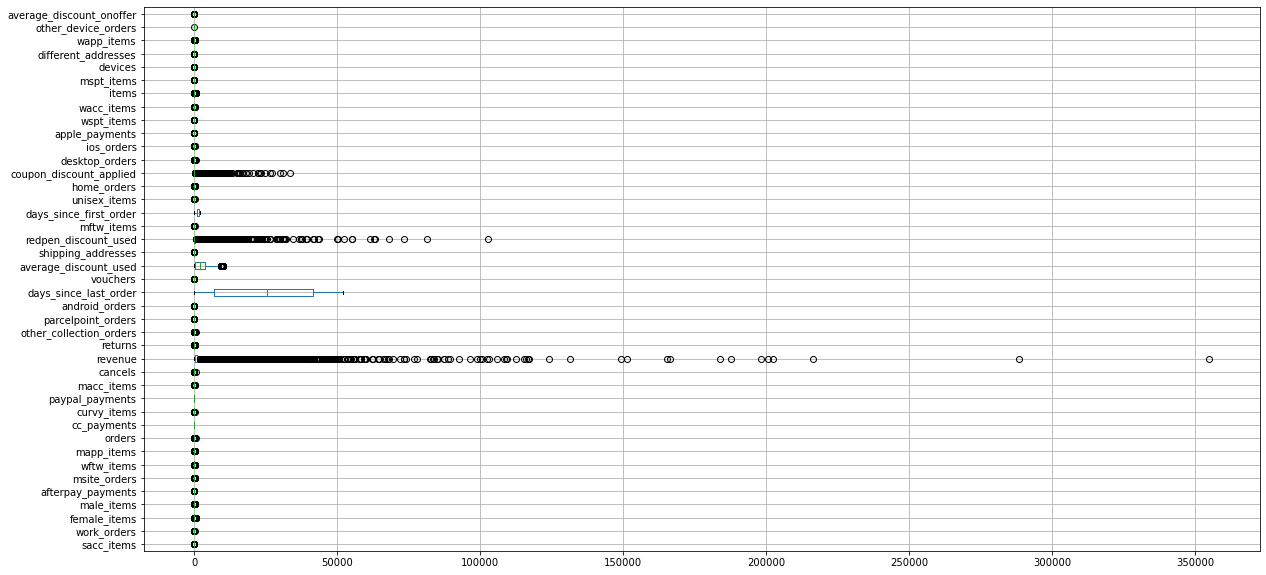

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)

In [ ]:
#corrupted column .. since no days is huge

In [ ]:
df['days_since_last_order']

0        15672
1          528
2          144
3        49200
4        49272
         ...  
46274     1200
46275     2976
46276    23952
46277    30888
46278     2688
Name: days_since_last_order, Length: 46030, dtype: int64

In [ ]:
#years
df['days_since_last_order']/365

0         42.936986
1          1.446575
2          0.394521
3        134.794521
4        134.991781
            ...    
46274      3.287671
46275      8.153425
46276     65.621918
46277     84.624658
46278      7.364384
Name: days_since_last_order, Length: 46030, dtype: float64

In [ ]:
# need to find out one more column which is corrupted

In [ ]:
#df.to_excel("output.xlsx")

In [ ]:
df[df.female_items>0].cc_payments.value_counts(normalize=True)*100

1    65.481287
0    34.518713
Name: cc_payments, dtype: float64

In [ ]:
df[df.cc_payments==1].revenue.sum()

50189328.55

In [ ]:
df.groupby(['cc_payments']).sum()

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,curvy_items,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
cc_payments,,,,,,,,,,,,,,,,,,,,,
0,979,1352,54171,18951,1146,11397,16749,9149,40201,612,...,8,3143,5583,77223,1408,19374,938,26817,0,3429.2047
1,3067,9741,243772,60251,1321,33646,58456,33503,149045,1290,...,18,14291,20834,317887,3942,39433,4420,148133,2,5324.3660


In [ ]:
df['is_newsletter_subscriber'].replace(['Y', 'N'],[1,0], inplace=True)

In [ ]:
df['is_newsletter_subscriber'].value_counts()

0    27203
1    18827
Name: is_newsletter_subscriber, dtype: int64

In [ ]:
df['female_item_rate']=df['female_items']/df['items']
df['male_item_rate']=df['male_items']/df['items']
df['unisex_items_rate']=df['unisex_items']/df['items']

In [ ]:
df[(df.female_item_rate==1) & (df.male_item_rate==1)& (df.orders>4.1)]

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer,female_item_rate,male_item_rate,unisex_items_rate


Write a code find out how many rows (customers) could have the value female_item_rate == 1
and the value male_item_rate == 1 and the value orders > 4.11

In [ ]:
df[(df.female_items==1)].male_item_rate.value_counts()

0.000000    9460
0.500000     502
0.666667     265
0.750000     114
0.333333      66
            ... 
0.968750       1
0.843750       1
0.583333       1
0.375000       1
0.785714       1
Name: male_item_rate, Length: 87, dtype: int64

In [ ]:
grouped_df = df.groupby("is_newsletter_subscriber")

In [ ]:
grouped_df.orders.mean()

is_newsletter_subscriber
0    2.484175
1    6.462474
Name: orders, dtype: float64

In [ ]:
grouped_df.orders.max()

is_newsletter_subscriber
0    665
1    234
Name: orders, dtype: int64

In [ ]:
grouped_df.orders.median()

is_newsletter_subscriber
0    1.0
1    3.0
Name: orders, dtype: float64

In [ ]:
def sum_digits(n):
    r=0
    while n:
        r,n=r+n%10,n//10
    return r

def check_studentid(studentid_list):

    studentid=sum(studentid_list)
    x=sum_digits(studentid)
    if x%2==0:
        print('versionII')
    else:
        print('versionI')
        
check_studentid([223019446,223019633,223019965])

versionI
